Data Cleaning - Deal with structural errors, transformation and standardization..

Data Manipulation - concatenate and merge the data.

# Importing libraries

In [3]:
import numpy as np
import pandas as pd

# Importing  the data 

In [4]:
df1 = pd.read_excel(r"C:\Users\heena\Downloads\data.xlsx",sheet_name = 0)
df2 = pd.read_excel(r"C:\Users\heena\Downloads\data.xlsx",sheet_name = 1)

In [5]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,#6,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,4.23,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,5.07,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,5.91,United Kingdom


In [6]:
df2.head()

,InvoiceNo,CustomerID
0,536365,17850.0
1,536365,17850.0
2,536365,17850.0
3,536365,17850.0
4,536365,17850.0


## structural errors

In [7]:
df1["Quantity"]  = df1["Quantity"].replace(r"[#*&]","",regex= True)

In [8]:
df1["Quantity"] 

0       6
1       6
2       8
3       6
4       6
       ..
229    24
230    24
231    24
232    48
233    96
Name: Quantity, Length: 234, dtype: object

In [9]:
df1["Quantity"]  = df1["Quantity"].replace(r"[#*&]","",regex= True).astype("int16")

In [10]:
df1["Quantity"]

0       6
1       6
2       8
3       6
4       6
       ..
229    24
230    24
231    24
232    48
233    96
Name: Quantity, Length: 234, dtype: int16

## Transformation

In [7]:
df1.isna().sum() # there is no missing values

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [9]:
df2.isna().sum() # in sheet no 1 we have missing values

InvoiceNo          0
CustomerID    135080
dtype: int64

In [10]:
df2["CustomerID"].fillna(df2["CustomerID"].median(),inplace = True)

In [11]:
df2.isna().sum() # missing values are filled

InvoiceNo     0
CustomerID    0
dtype: int64

In [13]:
df1["Quantity"].mean(),df1["Quantity"].median()

(23.22222222222222, 6.0)

In [14]:
log_quantity = np.log(df1["Quantity"])

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
 np.log(df1["Quantity"]).mean(), np.log(df1["Quantity"]).median() # after transforming the values become change

(2.1795132, 1.7917594909667969)

<Axes: ylabel='Density'>

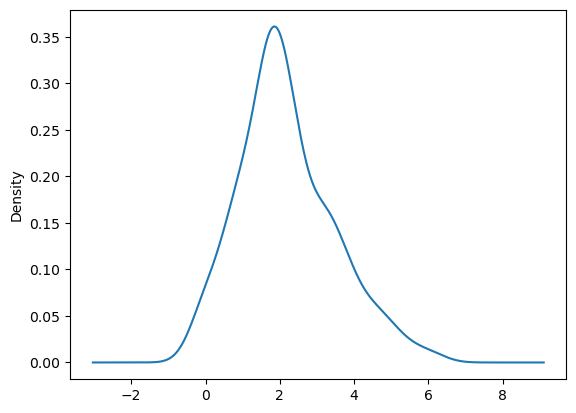

In [16]:
log_quantity.plot(kind = "kde")

In [18]:
sqrt_quantity = np.sqrt(df1["Quantity"])

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
np.sqrt(df1["Quantity"]).mean(),np.sqrt(df1["Quantity"]).median()

(3.7301188, 2.4494898319244385)

<Axes: ylabel='Density'>

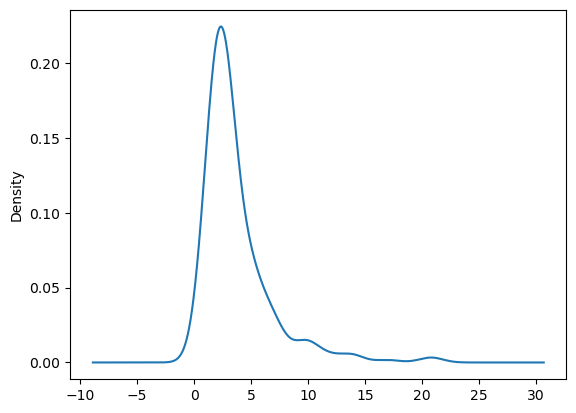

In [20]:
sqrt_quantity.plot(kind = "kde")

In [21]:
recipe_quantity = np.reciprocal(df1["Quantity"])

In [22]:
np.reciprocal(df1["Quantity"]).mean(),np.reciprocal(df1["Quantity"]).median()

(0.05128205128205128, 0.0)

<Axes: ylabel='Density'>

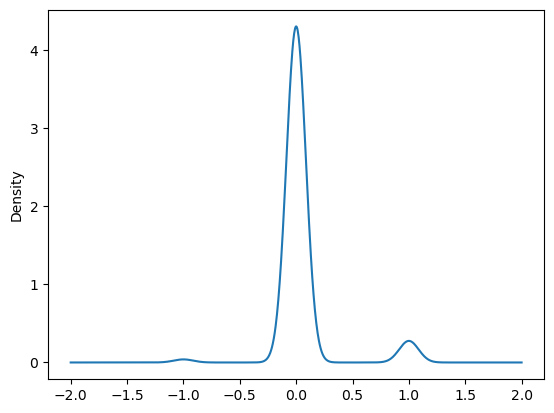

In [23]:
recipe_quantity.plot(kind = "kde") # reciprocal giving the best results

# standardization.

In [26]:
def standard(x): # the data is not distributed in normal thats why we are using standardization
    n = (x-df1["Quantity"]).mean()/df1['Quantity'].std()
    return n

In [27]:
standard = df1["Quantity"].apply(standard)

In [28]:
standard # after standardization the values are changed

0     -0.329666
1     -0.329666
2     -0.291383
3     -0.329666
4     -0.329666
         ...   
229    0.014888
230    0.014888
231    0.014888
232    0.474294
233    1.393106
Name: Quantity, Length: 234, dtype: float64

# concatenate and merge the data

In [32]:
concat = pd.concat([df1,df2],axis = 0,ignore_index = True) # if we dont take axis = 0 then also ok coz it takes default

In [33]:
concat

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6.0,3.39,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,4.23,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,5.07,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,5.91,United Kingdom,NaN
...,...,...,...,...,...,...,...
542138,581587,NaN,NaN,NaN,NaN,NaN,12680.0
542139,581587,NaN,NaN,NaN,NaN,NaN,12680.0
542140,581587,NaN,NaN,NaN,NaN,NaN,12680.0
542141,581587,NaN,NaN,NaN,NaN,NaN,12680.0


In [35]:
pd.merge(df2,df1,on ="InvoiceNo",how = "inner" ) # same columns from both data sets were meged

,InvoiceNo,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,17850.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom
1,536365,17850.0,71053,WHITE METAL LANTERN,6,3.39,United Kingdom
2,536365,17850.0,84406B,CREAM CUPID HEARTS COAT HANGER,8,4.23,United Kingdom
3,536365,17850.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,5.07,United Kingdom
4,536365,17850.0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,5.91,United Kingdom
...,...,...,...,...,...,...,...
4064,536390,17511.0,21485,RETROSPOT HEART HOT WATER BOTTLE,24,4.25,United Kingdom
4065,536390,17511.0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,24,3.39,United Kingdom
4066,536390,17511.0,84030E,ENGLISH ROSE HOT WATER BOTTLE,24,3.75,United Kingdom
4067,536390,17511.0,22174,PHOTO CUBE,48,1.48,United Kingdom
